<a href="https://colab.research.google.com/github/AnuragGorkar/Sigmoid_Neuron_Model/blob/master/Sigmoid_Neuron_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [0]:
import matplotlib.pyplot as  plt
import matplotlib.colors
import seaborn as sns
import numpy as np
from mpl_toolkits import mplot3d
sns.set()

In [0]:
def sigmoid (x,w,b):
  return 1/(1+np.exp(-(w*x + b)))

In [0]:
w = 0.6  #@param {type: "slider", min: -2, max: 2, step:0.1}
b = 1.2 #@param {type: "slider", min: -2, max: 2, step:0.1}
X = np.linspace(-10,10,100)

In [0]:
Y = sigmoid(X,w,b)
type(Y)

numpy.ndarray

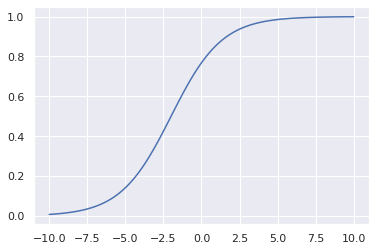

In [0]:
plt.plot(X, Y)
plt.show()

In [0]:
def sigmoid_2d (x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [0]:
W1 = 0.6   #@param {type: "slider", min: -2, max: 2, step:0.1}
W2 = 1.2   #@param {type: "slider", min: -2, max: 2, step:0.1}
b = -1 #@param {type: "slider", min: -2, max: 2, step:0.1}
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)


In [0]:
XX1, XX2 = np.meshgrid(X1, X2)

In [0]:
Y_2d = sigmoid_2d(XX1,XX2,W1,W2,b)
print(Y_2d.shape)

(100, 100)


Text(0.5, 0, 'y')

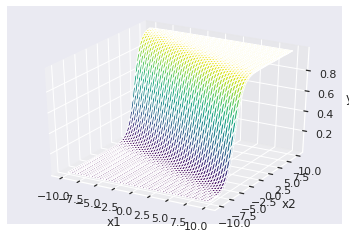

In [0]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1,XX2,Y_2d,cmap = 'viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Compute Loss For Given Dataset 

In [0]:
w_rand = 0.5
b_rand = 0.5
X_rand = np.random.random(25) * 20 - 10
Y_rand = sigmoid(X_rand, w_rand, b_rand)  

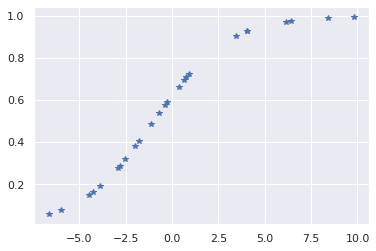

In [0]:
plt.plot(X_rand, Y_rand, '*')
plt.show()

In [0]:
def calc_loss (X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(X, w_est, b_est))**2
  return np.sum(loss)

In [0]:
W = np.linspace(-1,1, 100)
B = np.linspace(-1,1, 100)
WW , BB = np.meshgrid(W, B)

In [0]:
 inte = calc_loss(X_rand, Y_rand, WW[1,1], BB[1,1])
 type(inte)

numpy.float64

In [0]:
Loss = np.zeros(WW.shape)
for row in range(WW.shape[0]):
  for column in range(WW.shape[1]):
    Loss[row,column] = calc_loss(X_rand, Y_rand, WW[row,column], BB[row,column])

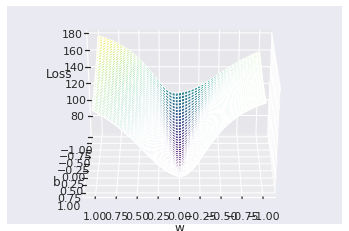

In [0]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW,BB,Loss,cmap = 'viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.view_init(30,90)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

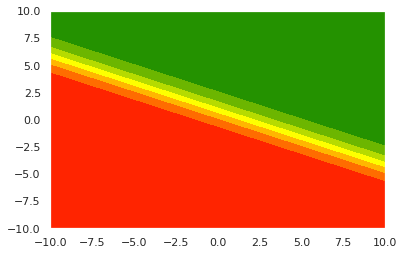

In [0]:
plt.contourf(XX1, XX2, Y_2d, cmap = my_cmap)
plt.show()

#SIGMOID NEURON CLASS


In [0]:
class sigmoidNeuron:

  def __init__ (self):
    self.w = None
    self.b = None 
  
  def perceptron(self, x):
    return np.dot(x,self.w.T) + self.b

  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred) 
  
  def fit(self, X, Y, epochs = 1, learningRate = 1, initialize = True):
    if initialize:
      self.w = np.random.rand(1, X.shape[1])
      self.b = 0
    for i in range(epochs):
      dw = 0 
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= dw * learningRate
      self.b -= db * learningRate
      print(self.w, self.b)




# SAMPLE DATA PLOT 

In [0]:
X = np.asarray([[2.5, 2.5], [4,-1], [1,-4], [-5,1.25], [2, 4], [1,5]])
Y = [1,1,1,0,0,0] 

In [0]:
sN  = sigmoidNeuron()

In [0]:
def plotSn(X,Y, sn):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1, X2)
  Y1 = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      input_values = np.asarray([X1[j], X2[i]])
      Y1[i,j] =  sN.sigmoid(sN.perceptron(input_values))
  my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
  ax.contour(XX1, XX2, Y1, cmap = my_cmap)
  ax.scatter(X[:,0], X[:,1], c = Y, cmap = my_cmap)
  


[[0.75949155 0.26570766]] [0.03186554]
[[ 0.74128313 -0.34148187]] [0.0324672]
[[ 0.65062867 -0.70845992]] [-0.0320531]
[[ 0.79690821 -0.59803245]] [0.02279521]
[[ 0.83495766 -0.65188578]] [0.02855877]
[[ 0.8863726  -0.67515517]] [0.04142998]
[[ 0.92816088 -0.70753597]] [0.05046126]
[[ 0.9695979  -0.73503477]] [0.05989004]
[[ 1.00820495 -0.76238586]] [0.06849528]
[[ 1.04511475 -0.78837193]] [0.07674633]
[[ 1.08032108 -0.81345058]] [0.0845962]
[[ 1.1140557  -0.83762047]] [0.09211477]
[[ 1.1464519  -0.86096948]] [0.09933233]
[[ 1.17763256 -0.8835539 ]] [0.10627882]
[[ 1.20769922 -0.90542602]] [0.11297799]
[[ 1.2367391  -0.92663116]] [0.11944997]
[[ 1.26482761 -0.94720963]] [0.12571189]
[[ 1.29203061 -0.96719749]] [0.13177851]
[[ 1.31840615 -0.98662725]] [0.13766277]
[[ 1.34400579 -1.00552846]] [0.14337603]
[[ 1.36887565 -1.02392807]] [0.14892841]


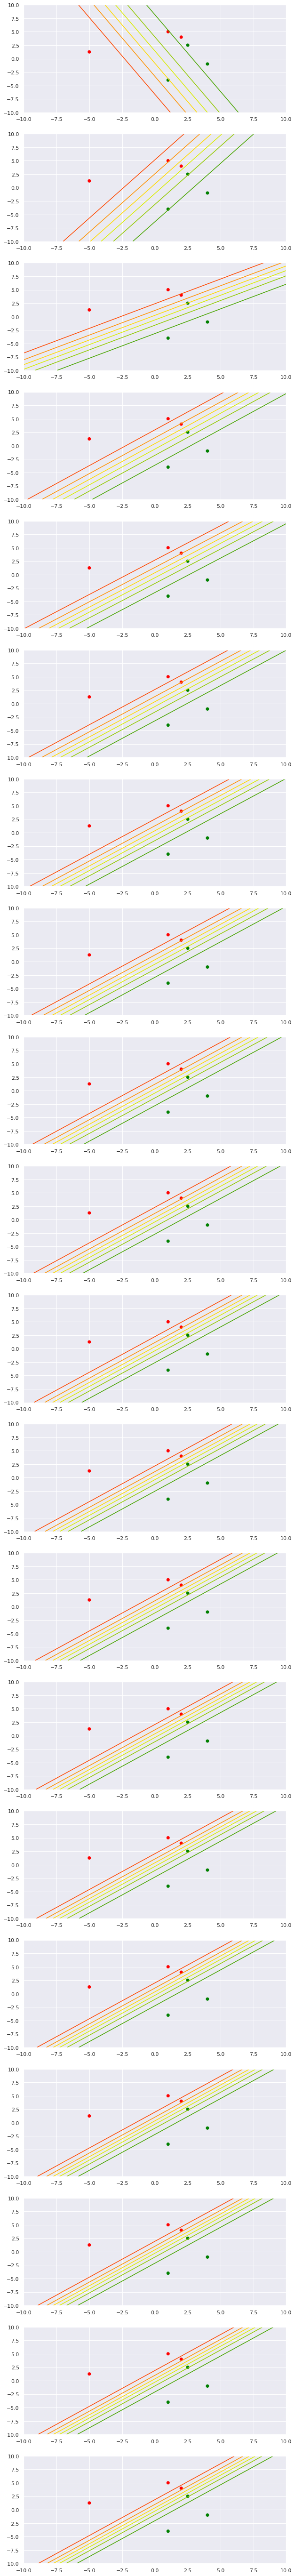

In [0]:
sN.fit(X,Y,1, 0.75, True)
N = 20 
plt.figure(figsize=(10,N*5))
for i in range(N):
  ax = plt.subplot(N, 1, i+1)
  plotSn(X,Y,sN)
  sN.fit(X, Y, 1, 0.5, False)